# Session 1 - Time series visualization
This workshop covers the fundamentals of time series management with Python. The objective is to provide the student with the fundamental knowledge to process, manage and visualize time series databases in Python. Python codes will be written and executed in Jupyter Notebook. Students will be provided with the databases to run the codes. Session 1 will be an introduction to the course.

### Session: 1 - July 15
### Time: 6pm- 8pm
### Lecturer: Esteban Cabrera (esteban.cabrera@pucp.edu.pe)

- [1. Introduction to time series in Python](#t1)
  - [1.1. Date and time in Python](#t1.1)
  - [1.2. Adding and subtracting time series](#t1.2)
  - [1.3. Creating a sequence of dates](#t1.3)
- [2. Indexing time series data](#t2)
  - [2.1. Transforming an index into a DateTimeIndex](#t2.1)
  - [2.2. Subsetting and indexing time series ](#t2.2)
- [3. Transforming time series data](#t3)
  - [3.1 Shifting time series and calculating percentage changes](#t3.1)
  - [3.2. Changing the frequency of time series data](#t3.2)
- [4. Plot summary statistics and synthesizing information](#t4)
  - [4.1. Plotting boxplots](#t4.1)
  - [4.2. Plotting histograms](#t4.2)
  - [4.3. Plotting density plots](#t4.3)

In [2]:
# Some basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <a id="t1"></a>1. Introduction to time series in Python

## <a id="t1.1"></a>1.1. Date and time in Python

Pandas was originally developed to manage finantial information, which is usually presented as time series data. The name is derived from the term "panel data", an econometrics term for data sets that include observations during multiple time periods. In this course, we are going to use to better manipulate time series data.

In [3]:
import pandas as pd # We import pandas
import numpy as np # We import other necessary libraries
from datetime import datetime # This will allow us to manually create dates

### ```pd.Timestamp()```
This function allows us to create points in time, providing a precise representation of a specific date and time. It is a powerful tool for working with time series data, enabling detailed and accurate time-based indexing, comparison, and arithmetic operations.

In [4]:
timestamp = pd.Timestamp(datetime(2024,7,15))
timestamp

Timestamp('2024-07-15 00:00:00')

In [5]:
timestamp = pd.Timestamp(datetime(2024,7,15, 18, 10, 5))
timestamp

Timestamp('2024-07-15 18:10:05')

We can use timestamp attributes to access various information of the data. For example, we can retrieve the year, month and even second of the timestamp. We can also use it to access the name of the week

In [6]:
timestamp.year # year

2024

In [7]:
timestamp.quarter # quarter

3

In [8]:
timestamp.month # month

7

In [9]:
timestamp.day # day

15

In [10]:
timestamp.hour # hour

18

In [11]:
timestamp.minute # minute

10

In [12]:
timestamp.second # second

5

In [13]:
timestamp.day_name()

'Monday'

In [14]:
timestamp.dayofweek

0

In [15]:
timestamp.weekofyear

29

In [16]:
timestamp.dayofyear

197

In [17]:
print(f'We are in day {timestamp.dayofyear} of 365 days')
print(f'This is the {timestamp.weekofyear}th week of the year')

We are in day 197 of 365 days
This is the 29th week of the year


### ```pd.Period()```
Allow us to create a `Period` object, which will always have a frequency. This is useful for representing a span of time with a specific start and end, such as a month, quarter, or year. 

In [18]:
period = pd.Period('2024')
period # By default, the last name of the year

Period('2024', 'A-DEC')

In [19]:
pd.Period('2024-07')

Period('2024-07', 'M')

In [20]:
pd.Period('2024-07-15')

Period('2024-07-15', 'D')

In [21]:
pd.Period('2024-07-15-18')

Period('2024-07-15 18:00', 'H')

In [22]:
pd.Period('2024-07-15-18-15')

Period('2024-07-15 18:00', 'H')

In [23]:
period.asfreq('D')

Period('2024-12-31', 'D')

In [24]:
period.asfreq('M')

Period('2024-12', 'M')

In [25]:
period.asfreq('Q')

Period('2024Q4', 'Q-DEC')

In [26]:
period.to_timestamp() # By default, the first day of year

Timestamp('2024-01-01 00:00:00')

In [27]:
period.to_timestamp().to_period('D') 

Period('2024-01-01', 'D')

### ```pd.Timedelta()```
`Timedelta` objects in pandas are used to represent differences in times, such as a duration or an interval. They are useful when doing basic arithmetic with Timestamp objects, allowing you to add or subtract durations from specific dates and times. This is particularly helpful in time series analysis, scheduling tasks, and manipulating date-time data.

In [28]:
pd.Timedelta(days=5, hours=3, minutes=30)

Timedelta('5 days 03:30:00')

In [29]:
pd.Timedelta(seconds=3600)

Timedelta('0 days 01:00:00')

In [30]:
pd.Timedelta(hours=1)

Timedelta('0 days 01:00:00')

In [31]:
pd.Timedelta(weeks=2)  

Timedelta('14 days 00:00:00')

## <a id="t1.2"></a>1.2. Adding and subtracting time series
We can do some basic date arithmetic with our time series objetcs

In [32]:
today = pd.Period('2024-07-15')
today

Period('2024-07-15', 'D')

In [33]:
today + 3

Period('2024-07-18', 'D')

In [34]:
today - 3

Period('2024-07-12', 'D')

In [35]:
pd.Timestamp('2024-07-15') + pd.Timedelta(days=3)

Timestamp('2024-07-18 00:00:00')

In [36]:
pd.Timestamp('2024-07-15') - pd.Timedelta(days=3)

Timestamp('2024-07-12 00:00:00')

In [37]:
period + 2

Period('2026', 'A-DEC')

In [38]:
period - 2

Period('2022', 'A-DEC')

In [39]:
july = pd.Period('2024-07')

In [40]:
july+5

Period('2024-12', 'M')

In [41]:
july-5

Period('2024-02', 'M')

## <a id='1.3.'> 1.3. Creating a sequence of dates </a> 

In order to create a time series, we will need a sequence of dates. In this subsection we will learn how to do that. 

### ```pd.date_range()```
This pandas function allows us to create a `DatetimeIndex`, which can be used to generate a range of dates with a specified frequency. This DatetimeIndex can serve multiple purposes, such as being used as an index for a DataFrame or Series, facilitating time series analysis, and aligning data to specific date ranges. 

In [42]:
pd.date_range(start='2003', periods=21, freq='Y')

DatetimeIndex(['2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31',
               '2023-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [43]:
pd.date_range(start='2013', periods=21, freq='M')

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30'],
              dtype='datetime64[ns]', freq='M')

In [44]:
index = pd.date_range(start='2024-01-01', periods=12, freq='M')
index[0]

Timestamp('2024-01-31 00:00:00', freq='M')

In [45]:
index.to_period()

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]')

In [46]:
index.to_period().to_timestamp()

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [47]:
# Creating a dataframe
datetime_index = pd.date_range(start='2024-01', periods=12, freq='M')
df_datetime = pd.DataFrame({'data': np.random.random(size=12)}, index=datetime_index)
df_datetime

,data
2024-01-31,0.622140
2024-02-29,0.410618
2024-03-31,0.363171
2024-04-30,0.846887
2024-05-31,0.479372
2024-06-30,0.905971
2024-07-31,0.654380
2024-08-31,0.993513
2024-09-30,0.197194
2024-10-31,0.488037


In [48]:
# We create the range of dates here from January 1st 2024 to January 7th 2024
days = pd.date_range(start='2024-7-15', periods =7, freq='D')

# We iterate over the dates and print the name of the weekday
for day in days:
    print(day.dayofweek, day.day_name())

0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday
6 Sunday


### `pd.period_range()`
This pandas function allows us to create a `PeriodIndex`, which can be used to generate a range of time periods with a specified frequency. 

In [49]:
pd.period_range(start='2003', periods=21, freq='Y')

PeriodIndex(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
             '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
             '2019', '2020', '2021', '2022', '2023'],
            dtype='period[A-DEC]')

In [50]:
pd.period_range(start='2024-01-01', periods=12, freq='M')

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]')

In [51]:
index = pd.period_range(start='2024-01-01', periods=12, freq='M')
index[0]

Period('2024-01', 'M')

In [52]:
index.to_timestamp()

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [53]:
index.to_timestamp().to_period()

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]')

In [54]:
# Creating a dataframe
period_index = pd.period_range(start='2024-01', periods=12, freq='M')
df_period = pd.DataFrame({'data': range(12)+np.random.random(size=12)}, index=period_index)
df_period

,data
2024-01,0.343502
2024-02,1.689067
2024-03,2.027464
2024-04,3.995915
2024-05,4.255877
2024-06,5.848353
2024-07,6.661689
2024-08,7.898616
2024-09,8.148814
2024-10,9.936129


### Differences between `PeriodIndex` and `DatetimeIndex`

| Feature             | `DatetimeIndex`                                         | `PeriodIndex`                                           |
|---------------------|---------------------------------------------------------|---------------------------------------------------------|
| **Definition**      | Sequence used to index time series by specific points in time | Sequence used to index time series by spans of time (periods) |
| **Granularity**     | Represents precise moments in time                      | Represents periods of time with a defined frequency      |
| **Flexibility**     | Allows operations involving specific timestamps         | Allows operations involving whole periods               |
| **Use**        | Ideal for data where exact timestamps are important (e.g., financial data, time series data) | Ideal for data aggregated over consistent intervals (e.g., monthly sales, quarterly reports) |
| **Creation Example**| `pd.date_range(start='2024-01-01', periods=31, freq='D')` | `pd.period_range(start='2024-01', periods=12, freq='M')`  |
| **Attributes**      | Access to year, month, day, hour, minute, second        | Access to start time, end time, and frequency            |
| **Timezone**        | Can be localized and converted to different timezones   | Does not involve timezones                               |
| **Use of Frequency**| Optional; can represent irregular time points           | Always associated with a specific frequency              |
| **Arithmetic Ops**  | Operations involve exact timestamps and `Timedelta` objects | Operations involve whole periods and period arithmetic   |
| **Typical Use Cases**| High-frequency data or data requiring precise timestamps | Regular interval data where periods matter more than exact timestamps |

During the development of this course we are going to mainly use `DatetimeIndex`

# <a id="t2"></a>2. Indexing time series data

## <a id="t2.1"></a>2.1. Transforming an index into a DateTimeIndex

### `pd.to_datetime()`

In [55]:
NVDA = pd.read_csv('../data/NVDA.csv', delimiter=';')
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [159]:
NVDA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000
2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000
2023-06-27,40.799000,41.939999,40.448002,41.875999,41.863468,462175000
2023-06-28,40.660000,41.845001,40.518002,41.117001,41.104691,582639000
2023-06-29,41.557999,41.599998,40.599998,40.821999,40.809776,380514000


In [57]:
NVDA.Date

0      23/06/2023
1      26/06/2023
2      27/06/2023
3      28/06/2023
4      29/06/2023
          ...    
246    14/06/2024
247    17/06/2024
248    18/06/2024
249    20/06/2024
250    21/06/2024
Name: Date, Length: 251, dtype: object

In [58]:
pd.to_datetime(NVDA.Date, format='%d/%m/%Y')

0     2023-06-23
1     2023-06-26
2     2023-06-27
3     2023-06-28
4     2023-06-29
         ...    
246   2024-06-14
247   2024-06-17
248   2024-06-18
249   2024-06-20
250   2024-06-21
Name: Date, Length: 251, dtype: datetime64[ns]

In [59]:
NVDA.Date = pd.to_datetime(NVDA.Date, format='%d/%m/%Y')

In [60]:
NVDA.set_index('Date', inplace=True)
NVDA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000
2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000
2023-06-27,40.799000,41.939999,40.448002,41.875999,41.863468,462175000
2023-06-28,40.660000,41.845001,40.518002,41.117001,41.104691,582639000
2023-06-29,41.557999,41.599998,40.599998,40.821999,40.809776,380514000


### `pd.read_csv()`

In [98]:
NVDA = pd.read_csv('../data/NVDA.csv', delimiter=';', parse_dates=["Date"], dayfirst=True, index_col="Date")
NVDA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000
2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000
2023-06-27,40.799000,41.939999,40.448002,41.875999,41.863468,462175000
2023-06-28,40.660000,41.845001,40.518002,41.117001,41.104691,582639000
2023-06-29,41.557999,41.599998,40.599998,40.821999,40.809776,380514000


## <a id="t2.2"></a>2.2. Subsetting a time series


Only possible if the index of the DataFrame contains the index of type DateTimeIndex

### `.loc`

In [67]:
NVDA.loc['2024'] # Select an entire year

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,49.243999,49.294998,47.595001,48.167999,48.161785,411254000
2024-01-03,47.485001,48.183998,47.320000,47.569000,47.562862,320896000
2024-01-04,47.766998,48.500000,47.507999,47.998001,47.991810,306535000
2024-01-05,48.462002,49.547001,48.306000,49.097000,49.090664,415039000
2024-01-08,49.512001,52.275002,49.479000,52.252998,52.246254,642510000
...,...,...,...,...,...,...
2024-06-14,129.960007,132.839996,128.320007,131.880005,131.880005,309320400
2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400
2024-06-18,131.139999,136.330002,130.690002,135.580002,135.580002,294335100


In [64]:
NVDA.loc['2023-06'] # Select an entire month

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000
2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000
2023-06-27,40.799000,41.939999,40.448002,41.875999,41.863468,462175000
2023-06-28,40.660000,41.845001,40.518002,41.117001,41.104691,582639000
2023-06-29,41.557999,41.599998,40.599998,40.821999,40.809776,380514000
2023-06-30,41.680000,42.549999,41.500999,42.301998,42.289337,501148000


In [69]:
NVDA.loc['2024-06', 'Open'] # Select an specific column

Date
2024-06-03    113.621002
2024-06-04    115.716003
2024-06-05    118.371002
2024-06-06    124.047997
2024-06-07    119.769997
2024-06-10    120.370003
2024-06-11    121.769997
2024-06-12    123.059998
2024-06-13    129.389999
2024-06-14    129.960007
2024-06-17    132.990005
2024-06-18    131.139999
2024-06-20    139.800003
2024-06-21    127.120003
Name: Open, dtype: float64

# <a id="t3"></a>3. Manipulating time series data

## <a id="t3.1"></a>3.1 Shifting time series and calculating percentage changes

### `.shift()`
This function is used to shift the values in a Series or DataFrame by a specified number of periods along a given axis, while preserving the alignment of the data. It can be used to create lagged or lead variables.

In [135]:
nvidia = NVDA[["Close"]].copy()

In [136]:
nvidia.head()

,Close
Date,
2023-06-23,42.209000
2023-06-26,40.632000
2023-06-27,41.875999
2023-06-28,41.117001
2023-06-29,40.821999


In [137]:
nvidia['lagged'] = nvidia["Close"].shift(periods=-30) # We shift 30 days backward

In [138]:
nvidia['shifted'] = nvidia["Close"].shift(periods=30) # We shift 30 days forward

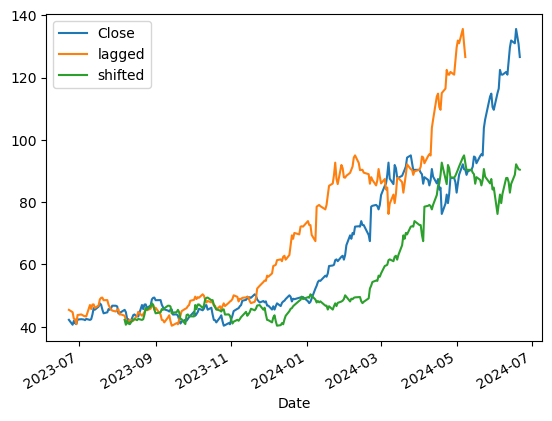

In [139]:
nvidia.plot()
plt.show()

In [143]:
nvidia = NVDA[["Close"]].copy()
nvidia['lagged'] = nvidia["Close"].shift(periods=-1) # We shift 1 days backward
nvidia['shifted'] = nvidia["Close"].shift(periods=1) # We shift 1 days forward
nvidia.head()

,Close,lagged,shifted
Date,,,
2023-06-23,42.209000,40.632000,NaN
2023-06-26,40.632000,41.875999,42.209000
2023-06-27,41.875999,41.117001,40.632000
2023-06-28,41.117001,40.821999,41.875999
2023-06-29,40.821999,42.301998,41.117001


In [145]:
nvidia.tail()

,Close,lagged,shifted
Date,,,
2024-06-14,131.880005,130.979996,129.610001
2024-06-17,130.979996,135.580002,131.880005
2024-06-18,135.580002,130.779999,130.979996
2024-06-20,130.779999,126.570000,135.580002
2024-06-21,126.570000,NaN,130.779999


### `.div()`, `.sub()` and `.mul()`
`.div()` is quite useful if we want to perform operations between columns. For example we can obtain the daily percent change just by dividing \
$$Y_t/Y_{t-1}$$

In [147]:
nvidia['change'] = nvidia.Close.div(nvidia.shifted) # We divide the price value by its past value
nvidia[["Close", "shifted", "change"]].head()

,Close,shifted,change
Date,,,
2023-06-23,42.209000,NaN,NaN
2023-06-26,40.632000,42.209000,0.962638
2023-06-27,41.875999,40.632000,1.030616
2023-06-28,41.117001,41.875999,0.981875
2023-06-29,40.821999,41.117001,0.992825


Then, if we want to calculate the return, we just need to substract 1 with `.sub()` and multiply the result by 100 with `.mul()` 

In [148]:
nvidia['return'] = nvidia.change.sub(1).mul(100)
nvidia[["Close", "shifted", "change", "return"]].head()

,Close,shifted,change,return
Date,,,,
2023-06-23,42.209000,NaN,NaN,NaN
2023-06-26,40.632000,42.209000,0.962638,-3.736170
2023-06-27,41.875999,40.632000,1.030616,3.061624
2023-06-28,41.117001,41.875999,0.981875,-1.812489
2023-06-29,40.821999,41.117001,0.992825,-0.717470


### `.diff()`
It allow us to quickly perform the following calculation to get the difference value of two adjacent values:
$$\Delta Y_t = Y_t - Y_{t-1} $$

In [150]:
nvidia['diff'] = nvidia.Close.diff()
nvidia[["Close", "change", "return", "diff"]].head()

,Close,change,return,diff
Date,,,,
2023-06-23,42.209000,NaN,NaN,NaN
2023-06-26,40.632000,0.962638,-3.736170,-1.577000
2023-06-27,41.875999,1.030616,3.061624,1.243999
2023-06-28,41.117001,0.981875,-1.812489,-0.758998
2023-06-29,40.821999,0.992825,-0.717470,-0.295002


### `.pct_change()`
It allows us to get the percentual change in the value of the variable

In [155]:
nvidia['pct_change'] = nvidia.Close.pct_change().mul(100)
nvidia[["Close", "shifted", "change", "return", "pct_change"]].head()

,Close,shifted,change,return,pct_change
Date,,,,,
2023-06-23,42.209000,NaN,NaN,NaN,NaN
2023-06-26,40.632000,42.209000,0.962638,-3.736170,-3.736170
2023-06-27,41.875999,40.632000,1.030616,3.061624,3.061624
2023-06-28,41.117001,41.875999,0.981875,-1.812489,-1.812489
2023-06-29,40.821999,41.117001,0.992825,-0.717470,-0.717470


In [166]:
# We can also get the return on multiple periods
nvidia['return_7d'] = nvidia.Close.pct_change(periods=7).mul(100)
nvidia[["Close", "return_7d"]].tail()

,Close,return_7d
Date,,
2024-06-14,131.880005,7.709901
2024-06-17,130.979996,8.249719
2024-06-18,135.580002,12.153400
2024-06-20,130.779999,7.381557
2024-06-21,126.570000,4.681164


In [173]:
nvidia['daily_return'] = nvidia['Close'].pct_change(periods = 1).mul(100) # Create a daily return
nvidia['monthly_return'] = nvidia['Close'].pct_change(periods = 30).mul(100) # Create a monthly return
nvidia['quarterly_return'] = nvidia['Close'].pct_change(periods = 120).mul(100) # Create a quarterly return

In [174]:
nvidia[["daily_return", "monthly_return", "quarterly_return"]].tail()

,daily_return,monthly_return,quarterly_return
Date,,,
2024-06-14,1.751411,53.675849,169.197795
2024-06-17,-0.682445,47.518267,168.236721
2024-06-18,3.511991,47.145652,175.127346
2024-06-20,-3.540347,44.422110,164.645768
2024-06-21,-3.219146,39.992474,155.583382


## <a id="t3.2"></a>3.2. Changing the frequency of time series data

### `.asfreq()`
It converts the time series to specified frequency. It returns the original data conformed to a new index with the specified frequency.

In [82]:
NVDA.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Here we see an example of upsampling. We increase the frequency changing it to calendar day. A higher frequency with the same data creates missing values.

In [75]:
NVDA_daily = NVDA.asfreq('D') # Change to calendar day frequency
NVDA_daily.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000.0
2023-06-24,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-25,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000.0
2023-06-27,40.799000,41.939999,40.448002,41.875999,41.863468,462175000.0


In [76]:
NVDA_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2023-06-23 to 2024-06-21
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [83]:
NVDA_daily.isna().sum()

Open         114
High         114
Low          114
Close        114
Adj Close    114
Volume       114
dtype: int64

Now we do the opposite, downsampling our data from calendar to business frequency

<AxesSubplot:xlabel='Date'>

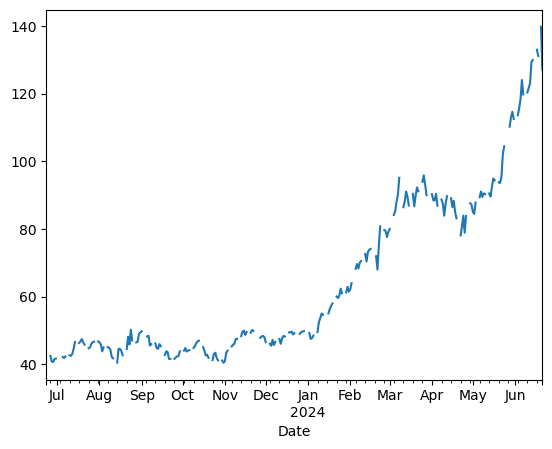

In [89]:
NVDA_daily.Open.plot() # We observe multiple missing data points

In [86]:
NVDA_business = NVDA_daily.asfreq('B') # Back to business frequency
NVDA_business.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000.0
2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000.0
2023-06-27,40.799000,41.939999,40.448002,41.875999,41.863468,462175000.0
2023-06-28,40.660000,41.845001,40.518002,41.117001,41.104691,582639000.0
2023-06-29,41.557999,41.599998,40.599998,40.821999,40.809776,380514000.0


In [90]:
NVDA_business.isna().sum()

Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64

<AxesSubplot:xlabel='Date'>

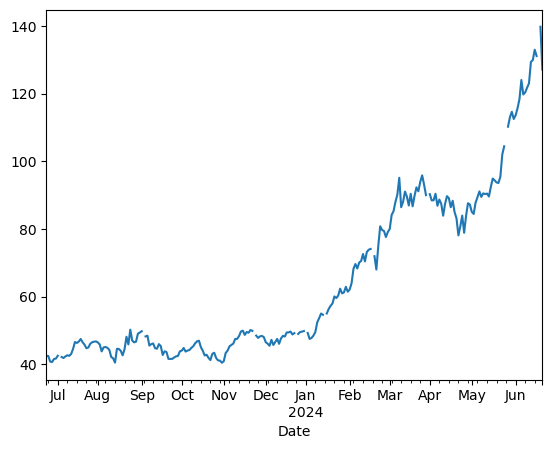

In [92]:
NVDA_business.Open.plot() # Converting twice the dataframe we have created missing points

<AxesSubplot:xlabel='Date'>

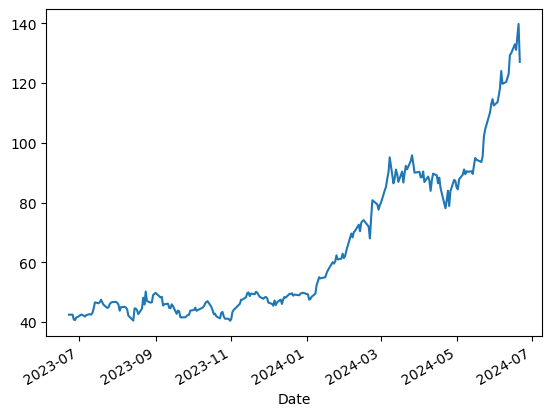

In [93]:
NVDA.Open.plot() # Compare it with the original dataframe

In [178]:
date = pd.date_range(start="2021", periods=4, freq="Q")
data = range(1, 5)

In [179]:
quaterly_data = pd.Series(data=data, index=date)
quaterly_data

2021-03-31    1
2021-06-30    2
2021-09-30    3
2021-12-31    4
Freq: Q-DEC, dtype: int64

In [193]:
# Upsampling, from quarter to month
monthly_data = quaterly_data.asfreq("M")
monthly_data

2021-03-31    1.0
2021-04-30    NaN
2021-05-31    NaN
2021-06-30    2.0
2021-07-31    NaN
2021-08-31    NaN
2021-09-30    3.0
2021-10-31    NaN
2021-11-30    NaN
2021-12-31    4.0
Freq: M, dtype: float64

In [194]:
monthly_data = monthly_data.to_frame("base")

In [198]:
monthly_data["ffill"] = quaterly_data.asfreq("M", method = "ffill")
monthly_data["bfill"] = quaterly_data.asfreq("M", method = "bfill")
monthly_data["fill_value"] = quaterly_data.asfreq("M", fill_value = 0)
monthly_data

,base,ffill,bfill,fill_value
2021-03-31,1.0,1,1,1
2021-04-30,NaN,1,2,0
2021-05-31,NaN,1,2,0
2021-06-30,2.0,2,2,2
2021-07-31,NaN,2,3,0
2021-08-31,NaN,2,3,0
2021-09-30,3.0,3,3,3
2021-10-31,NaN,3,4,0
2021-11-30,NaN,3,4,0
2021-12-31,4.0,4,4,4


### `.reindex()`
The `.reindex()` function in pandas is used to conform a DataFrame or Series to a new index, optionally filling in missing values if any indices are not present in the original data

In [200]:
quaterly_data.reindex(date)

2021-03-31    1
2021-06-30    2
2021-09-30    3
2021-12-31    4
Freq: Q-DEC, dtype: int64

## <a id='3.2.'> 3.2. Graficar datos agregados por año </a>

En ocasiones, vamos a querer agregar los datos de una serie temporal en subconjuntos más pequeños para obtener información más detallada o identificar patrones estacionales.
Después de agrupar los datos mensuales y calcular el promedio de CO2 para cada mes, generamos un gráfico que muestra claramente la tendencia estacional en los niveles de CO2 a lo largo del año.

In [174]:
# Obtenemos el índice de los meses del año
index_month = co2_levels.index.month 
index_month 

Index([ 3,  4,  4,  4,  4,  5,  5,  5,  5,  5,
       ...
       10, 11, 11, 11, 11, 12, 12, 12, 12, 12],
      dtype='int32', name='datestamp', length=2284)

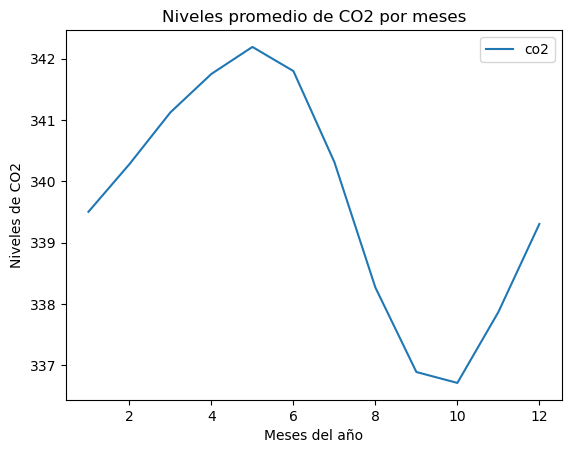

In [175]:
# Agrupamos por meses, obtenemos la media y lo graficamos
co2_levels_by_month = co2_levels.groupby(index_month).mean() 

co2_levels_by_month.plot()

plt.title('Niveles promedio de CO2 por meses')

plt.ylabel('Niveles de CO2')

plt.xlabel('Meses del año')

plt.show()

# Obtenemos un gráfico similar al de 1980, pero suavizado 

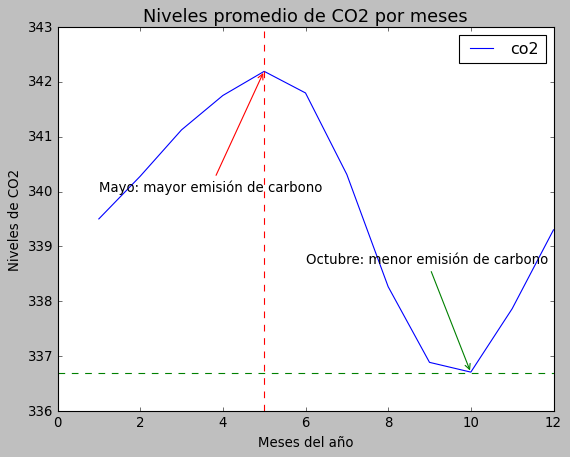

In [176]:
co2_levels_by_month = co2_levels.groupby(index_month).mean() 

plt.style.use('classic')

co2_levels_by_month.plot(figsize = (8, 6))

plt.title('Niveles promedio de CO2 por meses', fontsize = 16)

plt.ylabel('Niveles de CO2')

plt.xlabel('Meses del año')

plt.axvline(x = 5, linestyle = '--', color = 'red')

plt.annotate('Octubre: menor emisión de carbono', xy=(10, 336.7),
             xytext=(6, 338.6833), fontsize=12,
             color='black', arrowprops=dict(arrowstyle='->', color='green'))

plt.annotate('Mayo: mayor emisión de carbono', xy=(5, 342.2),
             xytext=(1, 340), fontsize=12,
             color='black', arrowprops=dict(arrowstyle='->', color='red'))

plt.axhline(y = 336.7, linestyle = '--',  color = 'green')

plt.show()

#  <a id='t4'> 4. Graficar estadísticas y sintetizar la información </a>
Si bien graficar y realizar anotaciones a los datos de series de tiempo es útil para compartir información, también es fundamental que recopile estadísticas de la serie de tiempo con la que estamos trabajando. Así podremos compartir y discutir las propiedades estadísticas de sus datos, lo cual puede apoyar a los gráficos que generemos y a las hipótesis que deseeamos comunicar.

Podemos usar df.describe() para obtener las principales estadísticas descriptivas

In [177]:
co_2.describe() # Principales estadísticas del dataframe

,co2
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


In [178]:
co2_levels.describe()

,co2
count,2284.000000
mean,339.657750
std,17.100899
min,313.000000
25%,323.975000
50%,337.700000
75%,354.500000
max,373.900000


In [179]:
discoveries.describe()

,Y
count,100.000000
mean,3.100000
std,2.254065
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,12.000000


In [72]:
# Imprimimos las principales estadísticas de co2_levels
print(co2_levels.describe())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000


In [180]:
co2_levels.mean()

co2    339.65775
dtype: float64

In [181]:
co2_levels.std()

co2    17.100899
dtype: float64

In [73]:
# Imprimimos los mínimos de la columna co2 en el DataFrame co2_levels
print(co2_levels.min())

co2    313.0
dtype: float64


In [74]:
# Imprimimos los máximos de la columna co2 en el DataFrame co2_levels
print(co2_levels.max())

co2    373.9
dtype: float64


## <a id='4.1.'> 4.1. Graficar boxplots (gráficos de caja) </a>
Los boxplots muestran la mediana, los cuartiles y la variabilidad de los datos, lo que facilita la identificación de tendencias centrales y valores atípicos en una distribución. Estos gráficos son particularmente útiles para comparar múltiples distribuciones de datos o identificar patrones y diferencias en un solo vistazo.

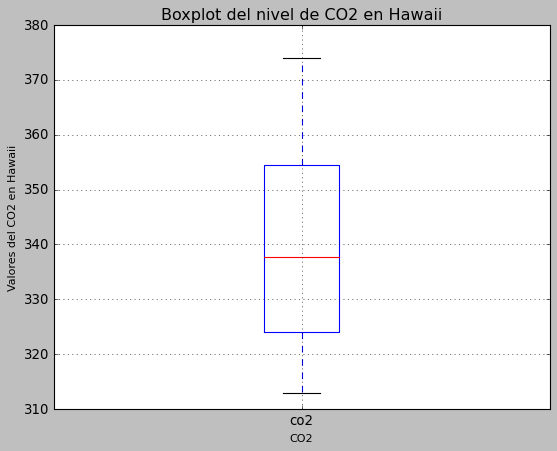

In [185]:
plt.style.use('classic')

# Generamos el boxplot
ax = co2_levels.boxplot()

ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Valores del CO2 en Hawaii', fontsize=10)
ax.set_title('Boxplot del nivel de CO2 en Hawaii')
plt.show()

El boxplot está destacando características clave como la mediana, los cuartiles y los valores atípicos. Las líneas que se extienden en paralelo desde las cajas se denominan comúnmente "bigotes" o "whiskers" en inglés, y se utilizan para indicar la variabilidad fuera de los cuartiles superior (que es el percentil del 75%) e inferior (que es el percentil del 25%), es decir, los valores atípicos.

Text(0.5, 1.0, 'Boxplot del nivel de CO2 en Hawaii')

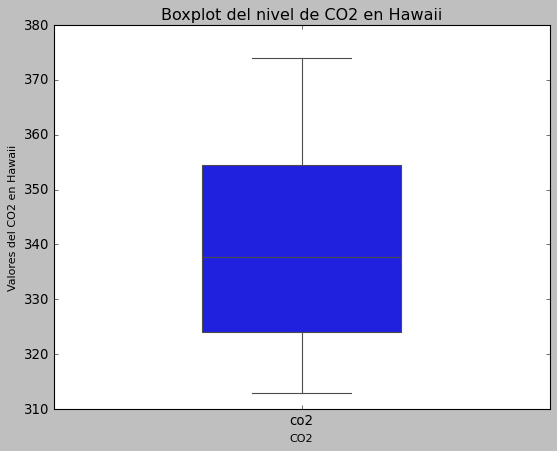

In [191]:
# También se puede realizar utilizando seaborn
plt.figure(figsize=(8, 6))

sns.boxplot(co2_levels, width=0.4)

plt.xlabel('CO2', fontsize=10)

plt.ylabel('Valores del CO2 en Hawaii', fontsize=10)

plt.title('Boxplot del nivel de CO2 en Hawaii')


## <a id='4.2.'> 4.2. Graficar histogramas </a>

Los histogramas son una representación visual efectiva de la distribución de datos en un conjunto, permitiendo identificar rápidamente la concentración de valores en diferentes intervalos o "bins". Al mostrar la frecuencia con la que ocurren los valores en cada bin, los histogramas destacan la tendencia central de los datos y la forma general de su distribución, ya sea simétrica, sesgada o multimodal. 


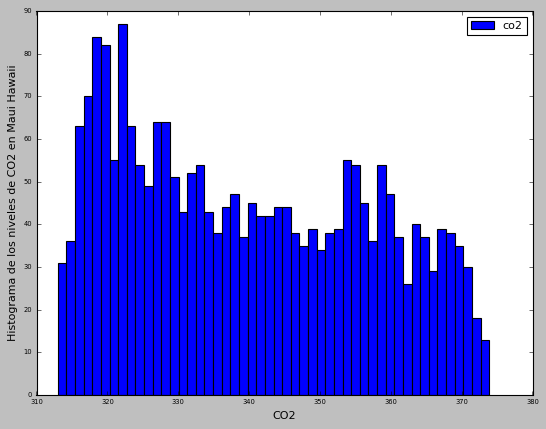

In [196]:
# Generamos un histograma
ax = co2_levels.plot(kind='hist', bins = 50, fontsize=6)

ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histograma de los niveles de CO2 en Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

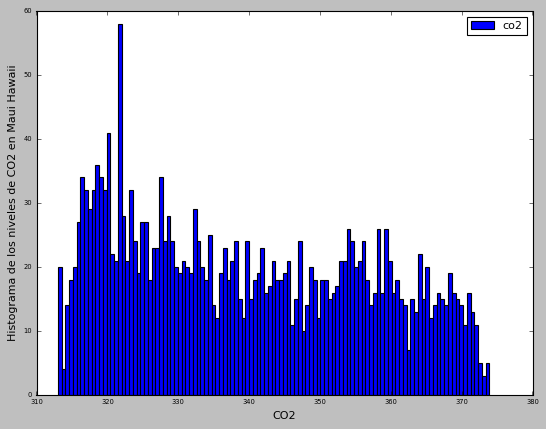

In [197]:
ax = co2_levels.plot(kind='hist', bins = 115, fontsize=6)

ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histograma de los niveles de CO2 en Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

## <a id='4.3.'> 4.3. Crear gráficos de densidad </a>
Los gráficos de densidad ofrecen una perspectiva detallada de la distribución de datos al visualizar la concentración de valores a lo largo de una variable continua. Nos permiten observar las tendencias centrales y las formas de distribución con mayor suavidad y precisión que los histogramas. 
Al presentar la densidad de probabilidad de los datos, los gráficos de densidad resaltan la presencia de múltiples modas o picos, la simetría o asimetría en la distribución, y las áreas de alta concentración de datos. 

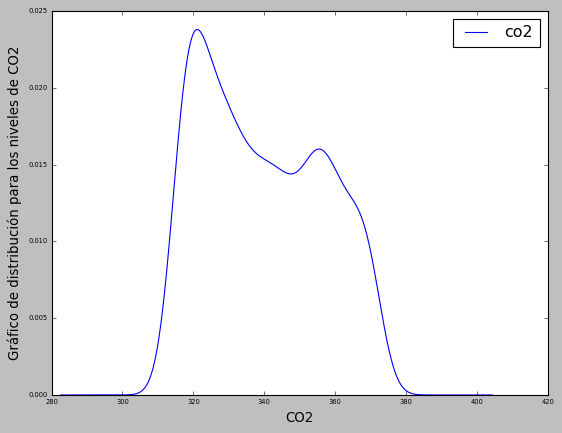

In [198]:
ax = co2_levels.plot(kind='density', linewidth = 1, fontsize = 6)

ax.set_xlabel('CO2')

ax.set_ylabel('Gráfico de distribución para los niveles de CO2')

plt.show()